In [1]:
import numpy as np # primary math library
import matplotlib.pyplot as plt # primary plotting library
import numpy as np
import matplotlib.path as mpath
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
# %matplotlib qt
#%matplotlib notebook

%matplotlib inline

import nelpy as nel # should be installed using pip install nelpy

import warnings
#warnings.filterwarnings("ignore") # useful to prevent excess nelpy warnings

In [2]:
dataroot = '/Users/ckemere/Development/Data/Frank/';

In [3]:
import os

filename = os.path.join(dataroot,'FrankLabData.nel')
import pandas as pd
import nelpy.io
jar = nel.load_pkl(filename)
data = jar.data
# if you are interested in the global task structure or characteristics of all the neurons 
#     recorded, they can be found in Pandas dataframes which are also saved in the file
taskinfo = jar.taskinfo
cellinfo = jar.cellinfo
tetinfo = jar.tetinfo

filename = os.path.join(dataroot,'FrankLabVertices.nel')
jar = nel.load_pkl(filename)

FamiliarVertices = jar.FamiliarVertices
NovelVertices = jar.NovelVertices

In [6]:
# The animal "Bon" had good data on day 3
anim = 'Bon'
ep = 3
S = data[anim][ep]['spikes']
pos = data[anim][ep]['pos']

In [8]:
NovelVertices[anim]

array([[  41.53225806,   70.625     ],
       [  71.06683806,   72.07107488],
       [ 108.5483871 ,   73.90625   ],
       [ 104.43548387,  155.20833333],
       [  69.51441659,  151.84513844],
       [  40.08064516,  149.01041667],
       [  50.        ,   50.        ]])

/Users/ckemere/Development/Python/nelpy/nelpy/core/_analogsignalarray.py:449: UserWarning: ignoring signal outside of support


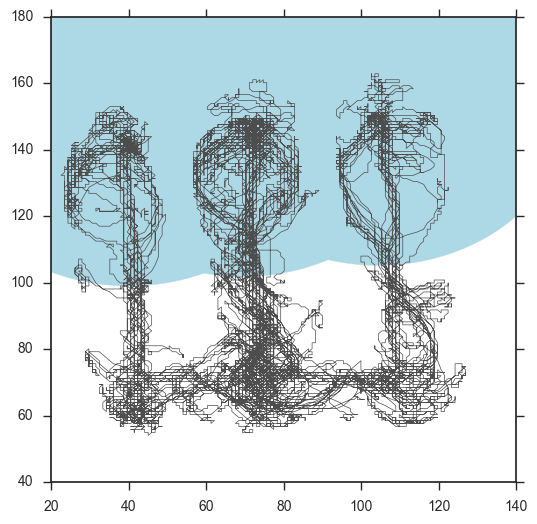

In [17]:
import nelpy.plotting as npl
# Set default figure aesthetics
npl.setup(font_scale=1)

endpoints = NovelVertices[anim][[3,4,5]]
circles = []
for c in endpoints:
    circles.append(plt.Circle(c, 50, color='lightblue'))

with npl.FigureManager(show=True, figsize=(6, 6)) as (fig, ax):
    npl.utils.skip_if_no_output(fig)

    tvals, vals = pos[[1,3],:].asarray() # Access timestamps and channel data as numpy arrays
    xvals, yvals = vals # Access two channels as x and y
    ax.plot(xvals, yvals, lw=0.5, c='0.3')
    for cir in circles:
        ax.add_artist(cir)